## Convexity: Fundamental Property in Optimization

Many practical problems in optimization are _convex_, which makes them easier to solve in theory and practice.  
   
- **def:** A set $S \in \mathbb{R}$ is a *convex set* if for any $x,y \in S$, the following holds for all $\alpha \in [0,1]$ 
   $$\alpha x + (1 - \alpha)y \in S.$$  

- **def:** A function f is a *convex function* if its domain $S$ is a convex set and if for any $x,y \in S$, the following holds for all $\alpha \in [0,1]$
   $$f(\alpha x + (1 - \alpha) y) \leq  \alpha f(x) + (1-\alpha) f(y).$$ If the above inequality holds strictly, we say $f$ is a *strictly convex function*.  

- **def:** A function $f$ is said to *concave* if $-f$ is convex.  


#### Examples of *convex sets*:  

- The open ball about x or radius r, i.e. $B_r(x) = \{ y \in \mathbb{R}^n : ||y - x||_2 \leq r \}$.  

- Any polyhedron, i.e. the set defined by linear equalities and inequalities, $\{ x \in \mathbb{R}^n : Ax = b, Cx \leq d \}$ where $A,C,b,d$ are appropriate dimensions.  

#### Examples of *convex functions*:  

- Any linear function of the form $f(x) = c^T x + \alpha$ for any constant vector $c \in \mathbb{R}^n$ and $\alpha \in \mathbb{R}$.  

- The convex quadratic function $f(x) = x^T H x$, where $H$ is a symmetric positive semidefinite matrix (SPD).  

If the objective function and feasible region, defined by the given constraints, are both convex, then any local solution of the problem is a global solution.  

&nbsp; 

## Desired Iterative Optimization Algorithm Properties

- **Robustness** - They perform on a wide variety of problems in their class, for any reasonable starting iterate.
- **Efficiency** - In terms of time and space complexity
- **Accuracy** - Identify a solution with precision, without being overly sensitive to errors in the data or floating-point arithmetic rounding errors.  

&nbsp;  

## Unconstrained Optimization

The problem is to minimize an objective function that depends on real variables with no constratins, stated as $$\min_{x \in \mathbb{R}^n} f(x)$$ where $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is a smooth function. 

#### Solution Types

- **def:** A point $x^*$ is a *global minimizer* if $f(x^*) \leq f(x) ~ \forall x$.  

- **def:** A point $x^*$ is a *local minimizer* if there is a neighboorhood $N$ of $x^*$ such that $f(x^*) \leq f(x) ~ \forall x \in N$.  

- **def:** A point $x^*$ is a *strict local minimizer* if there is a neighboorhood $N$ of $x^*$ such that $f(x^*) < f(x) ~ \forall x \in N$ with $x \not = x^*$.  

- **def:** A point $x^*$ is an *isolated local minimizer* if there is a neighboorhood $N$ of $x^*$ such that $x^*$ is the only local minimizer in $N$.  


Ideally, our algorithm determines a global minimizer. 

&nbsp;

## Solution Criterion  

The mathematical tool to study minimizers of smooth functions is Taylor's Theorem, which allows us to derive _necessary_ and _sufficient_ conditions.  

&nbsp;  

**Theorem 2.1** (Taylor's Theorem): Suppose that $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is continuosly differentiable and $p \in \mathbb{R}^n$. Then we have that
$$ f(x + p) = f(x) + \nabla f(x + tp)^T p ,$$
for some $t \in (0,1)$. Moreover, if $f$ is twice continuously differentiable, we have have that
$$ f(x + p) = f(x) + \nabla f(x + tp)^T p  + \frac{1}{2} p^T \nabla^2 f(x + tp)p,$$
for some $t \in (0,1)$.  

&nbsp; 

**Theorem 2.2** (First-Order Necessary Conditions): If $x^*$ is a local minimizer and $f$ is continuously differentiable in an open neighborhood of $x^*$, then $\nabla f(x^*) = 0$.  

&nbsp; 

**def:** We call $x^*$ a _stationary point_ if $\nabla f(x^*) = 0$.  
+ By theorem 2.2 any local minimizer must be a stationary point.  

&nbsp; 

** Theorem 2.3** (Second-Order Necessary Conditions): If $x^*$ is a local minimizer of $f$ and $\nabla^2 f$ exists and is continuous in an open neighborhood of $x^*$, then $\nabla f(x^*) = 0$ and $\nabla^2 f(x^*)$ is positive semidefinite.  

&nbsp; 

** Theorem 2.4** (Second-Order Sufficient Conditions): Suppose that $\nabla^2 f$ is continuous in an open neighborhood of $x^*$ and that $\nabla f(x^*) =0$ and that $\nabla^2 f(x^*)$ is positive definite. Then $x^*$ is a strict local minimizer of f.  

&nbsp; 

** Theorem 2.5**: When $f$ is convex, any local minimizer $x^*$ is a global minimizer of $f$. If in addition $f$ is differentiable, then any stationary point $x^*$ is a global minimizer of $f$.  

&nbsp; 

The results above provide the foundations for unconstrained optimization algorithms, which all seek a point where $\nabla f(\cdot) $ vanishes.  

&nbsp; 

## Iterative Optimization Algorithms Strategies: Line Search and Trust Region


Either of the two algorithm strategies seek begin with an initial guess $x_0$ and generate a sequence of iterates $(x_k)$ that terminates when either no more progress can be made or when it seems that a solution point has been approximated with sufficient accuracy.
There are two approaches for deciding how to move from one iterate $x_k$ to the next, $x_{k+1}$:
+ _montone_ algorithm's enforce that the next iterate satisfies $f(x_k) < f(x_{k+1})$  
+ _nonmontone_ algorithms enforce that $f$ is decreased after a prescribed number of iterations $m$, i.e. $f(x_k) < f(x_{k-m})$ 

#### Line Search Strategy
- Determine a search direction $p_k$ from the current itterate $x_k$.  
- Pick a step-size $\alpha$ that solves (or approximates) the one-dimensional minimization problem $\arg \min_{\alpha > 0} f(x_k + \alpha p_k)$.  
- Update the incumbent solution to determine the next iterate $x_{k+1}$.  

At $x_{k+1}$, the process repeats unless flaged otherwise, e.g. a lack of suffiecient progress or $x_{k+1}$ is a sufficient approximation.
It must be noted, there is no guarantee of a rate of convergance that the algorithm will determine a sufficient approximation of the true solution $x^*$.  

#### Trust Region Strategy
- construct a model function $m_k$ who's behavior around the iterate $x_k$ is similiar to the behavior of $f$ around $x_k$.  
    - determine a trust-region, where we believe $m_k$ is a good approximater of $f$.  
- Solve the sub-problem $\min_p m_k(x_k + p)$ where $x_k + p$ lies inside the trust region.  
    - If the determined direction solution leads to a sufficient decrease, the new iterate is $x_{k+1} = x_k + p$ and we may allow for a larger trust-region on the next iteration.  
    - Otherwise, the trust-region may have been to large and we constrain the search to a smaller region before progressing to the next iterate.  



    
    

## Line Search Algorithms  

A line search algorithm must determine a search direction $p_k$ and a step length $\alpha_k$.
Most line search algorithms require $p_k$ to be a descent direction, i.e. $p_k^T \nabla f_k < 0$, because this ensures that $f$ can be reduced along this direction.
The search direction often has the form $$ p_k = -B_k^{-1} \nabla f_k $$ where $B_k$ is a symmetric and nonsingular matrix.  
- The steepest descent method sets $B_k$ to the indentity matrix, so you search in the direction given by the gradient.  
- Newton's method set's $B_k$ to the exact Hessian $\nabla^2 f(x_k)$.  
- In quasi-Newton methods, $B_k$ is an approximation to the Hessian that is updated at every iteration by means of a low-rank formula.  

When defining a search direction of such form, and enforcing the condition that $B_k$ is positive definite we have
$$ p_k^T \nabla f_k = (-B_k^{-1} \nabla f_k)^{-1} \nabla f_k = -\nabla f_k^T B_k^{-1}\nabla f_k < 0 $$
and consequently, our choice of $p_k$ is a direction of descent. Then a step $\alpha > 0$ leads to a monotone scheme.  


At the $kth$ iteration, we must evaluate the tradeoff between solving $\arg \min_{\alpha_k} f(x_k + \alpha_k p_k)$ or following a lighter-cost procedure that determines an $\alpha_k$ approximate of the one-dimensional minimization problem.
Generally, a lighter-cost procedure is preffered and there exist many variants.
However, determining such a procedure that produces convergence is not always an easy task, e.g. incruementing by a $\Delta p$ until we have determined a $\alpha_k = n \Delta p$ such that $f(x_k + \alpha_k p_k) < f(x_k)$ will not gaurentee convergence.
There are many conditions discussed in chapter 3, each having there faults and utility based upon the method used in determining the search direction.




## Excercise 

Below is a program of the steepest descent and Newton algorithms using the backtracking line search.
I use it to minimize the Rosenbrock variant (https://en.wikipedia.org/wiki/Rosenbrock_function), namely, the second 'more involved variant'

#### Backtracking line-search:  
Is a scheme for picking a step size $\alpha_k$. The idea is that a step $\alpha_k$, in the direction $p_k$, should lead to a reduction in $f$ proportional to the both $a_k$ and the directional derivative $\nabla f_k^T p_k$. This is expressed as the _Armijo condition_, namely, 
$$ f(x_k + \alpha_k p_k) \leq f(x_k) + c \alpha_k \nabla f_k^t p_k. $$

Note, the _Armijo condition_ alone is not suifficient to ensure our algorithm makes suffiecient progress along the given search direction $p_k$ because any small step will pass the test. Therefore, we can add a _curvature condition_ to ensure we do not take two short of a step:
$$ \nabla f(x_k + \alpha_k p_k)^T p_k \geq c_2 \nabla f_k^Tp_k. $$
Then enforcing $0 < c_1 < c_2 < 1$, we refer to the two inequalities as the _Wolfe conditions_.
There exists an $\alpha_k$ satisfying the _Wolfe conditions_ for every f that is smooth and bounded below.
It can be shown that this backtracking will lead to a productive iteration for $f$ having a positive definite hessian. (*confirm statement*)

However, if we find an $\alpha_k$ that meet's the criterion, we can perform a _backtracking_ of $\alpha_k$ by a varying factor of $\rho$ such that our _curvature condition_ is met. This is a popular approach for terminating a Newton method.

We begin by defining the Rosenbrock variant, it's gradient and perform a breif analysis.

Is ForwardDiff.gradient() similar to analytical formula of Rosenbrock gradient? true

Is ForwardDiff.hessian() similar to analytical formula of Rosenbrock hessian? true



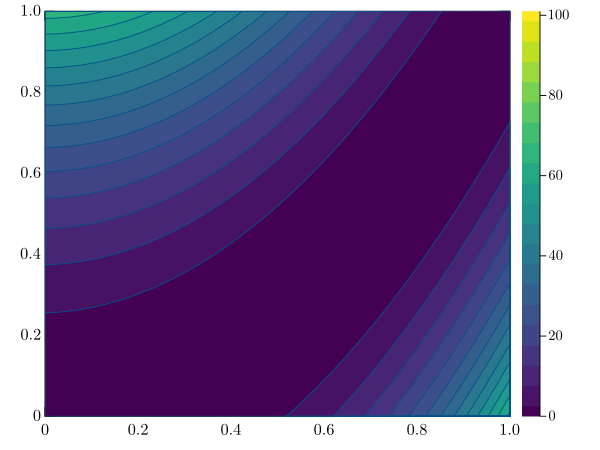

In [1]:
using GR, ForwardDiff

# rosenbrock function 
function rosen(x)
    fVal = 0.0
    for i in 1:length(x)-1
        fVal += 100.0*(x[i+1] - x[i]^2)^2 + (1.0-x[i])^2
    end
    return fVal
end

# gradient in the direction of dx
function rosend(x, dx)
    fVal = df = 0.0; 
    for i in 1:length(x)-1
       (fVal  += 100.0*(x[i+1] - x[i]^2)^2 + (1.0-x[i])^2;
        df    += 200.0*(x[i+1] - x[i]^2)*(dx[i+1] -2.0*x[i]*dx[i] ) - 2.0*(1.0 - x[i])*dx[i])
    end
    return (fVal,df)
end

# hessian 
function rosendd(x, dx1, dx2)
    fVal = df = ddf = 0.0;
    for i in 1:length(x)-1
       (fVal  += 100.0*(x[i+1] - x[i]^2)^2 + (1.0-x[i])^2;
        df    += 200.0*(x[i+1] - x[i]^2)*(dx1[i+1] -2.0*x[i]*dx1[i] ) - 2.0*(1.0 - x[i])*dx1[i];
        ddf   += 
            200.0*(dx2[i+1] - 2.0*x[i]*dx2[i])*(dx1[i+1] -2.0*x[i]*dx1[i]) 
          + 200.0*(x[i+1] - x[i]^2)*(0.0 -2.0*dx2[i]*dx1[i])  + 2.0*dx2[i]*dx1[i] )
    end
    return (fVal,df,ddf)
end;



# create ForwardDiff aliases for the Rosenbrock gradient and hessian to ensure our analytical formulas are correct
df = (x, p) -> p'*ForwardDiff.gradient(rosen, x)
ddf = (x, p1, p2) -> p1'*ForwardDiff.hessian(rosen, x)*p2

# A quick check...
x = rand(20)
p1 = rand(20)
p2 = rand(20)
println("Is ForwardDiff.gradient() similar to analytical formula of Rosenbrock gradient? ", df(x,p1) ≈ rosend(x,p1)[2], "\n")
println("Is ForwardDiff.hessian() similar to analytical formula of Rosenbrock hessian? ", ddf(x,p1,p2) ≈ rosendd(x,p1,p2)[3], "\n")

# The 2d rosenbrock has a global min at (1,1)
xVec = LinRange(0, 1, 40)
yVec = LinRange(0, 1, 40)
contourf(xVec, yVec, (xVec, yVec) -> rosen([xVec yVec]))


#### function line_search_backtracking 
NOT FINISHED, Returns a step size $\alpha_k$ for a given $x_k$ and direction $p_k$. Unsure how to determine $\rho$

&nbsp;  

#### function line_search:
An iterative procedure for finding an approximation to the minimum of the one-dimensional function $f(x_k + \alpha p_k)$.
The function returns an $\alpha$ that satisfies the strong Wolfe termination conditions (section 3.1), using $c_1 = 10^{-4}$ and $c_2 = .9$.
A step size produced by line_search(), with a given descent direction $p_k$, will ensure a convergent optimization procedure for $f$ that our continuously differentiable, bounded below and Lipchnitz continuous. This should be used to determine a step size on general nonlinear functions $f$

&nbsp;

#### function zoom:
Enusres that our selection of $\alpha$ also satisfies the curvature condition. This function is called in **line_search**.  

&nbsp;

#### function newton_iteration:
Performs a newton iteration, solving for the newton direction explicitly and crossing my fingers that it works. (i.e. the hessian isn't necessarily positive definite, and we should be using an approximation that is) Utilizes **line_search** to select a step size at each iteration.

&nbsp;

#### function steep_descent_iteration: 
Performs a steepest descent iteration as given by the negative of the gradient. Utilizes **line_search** to select a step size at each iteration.

&nbsp;  

**NOTE**  
The use of globals and aliases in our function namespaces. This is horribley ineffecient, but it made it easier writing the algorithms. TODO: look into a way to have the forward diff return what we need in one function call when we compute the Hessian. 


In [2]:
using LinearAlgebra

f = x -> rosen(x)
df = (x, p) -> p'*ForwardDiff.gradient(rosen, x)
H = h -> ForwardDiff.hessian(rosen, h)
g = h -> ForwardDiff.gradient(rosen, h)

# globals used in selecting a step alpha
c1 = 10^(-4)
c2 = 0.9



function line_search_backtracking(xk, pk) 
    ak = 1
    rho = 0.9
    (fxk, dfxk) = rosend(xk, pk) 

    while rosen(xk + ak.*pk) <= fxk + c1 * ak * dfxk
        ak = rho * ak
    end
    ak
end

# NOTE: must declare a global f and df to use this step size selector
function zoom(x, p, a_l, a_h)
    a_star = 0.0
    flag = false
    while !flag
        a_m = (a_h - a_l)/2 + a_l
        fx = f(x)
        dfx = df(x, p)
        fa_m = f(x + a_m .* p)
        if fa_m > f(x) + c1*a_m*dfx || fa_m >= f(x + a_l .* p )
            a_h = a_m
        else 
            dfa_m = df(x + a_m .* p, p)
            if abs(dfa_m) <= -c2*dfx
                a_star = a_m
                flag=true
            end
            if dfa_m * (a_h - a_l) >= 0
                a_h = a_l
            end
            a_l = a_m
        end
    end
    a_star
end

# NOTE: must declare a global f and df to use this step size selector
function line_search(x, p, a_max)
    a_star = a_l = 0.0
    a_h = a_max/2
    fx = f(x)
    dfx = df(x, p)
    flag = false
    while !flag
        fa_h = f(x + a_h.*p)
        if (fa_h > fx + c1 * a_h .* dfx) || (f(x + a_h .* p) >= f(x + a_l .* p) && a_l != 0.0)
            a_star = zoom(x, p, a_l, a_h)
            flag=true
        end
        dfa_h = df(x + a_h.*p, p)
        if abs(dfa_h) <= -c2 *dfx
            a_star = a_h 
            flag=true
        end
        if df_a >= 0
            a_star = zoom(x, p, a_h, a_l)
            flag=true
        end
        a_l = a_h
        a_h = (a_max - a_h)/2 + a_h
    end
    a_star
end


function newton_iteration(x0)
    i = 0
    while i < 10
        println("newton_iteration: Hit")
        pk = H(x0)\g(x0)
        x0 += line_search_backtracking(x0, pk) .* pk
        i += 1
    end
    x0
end



newton_iteration (generic function with 1 method)

In [3]:
xNot = [1.2, 1.2]
pk = H(xNot)\g(xNot)

newton_iteration(xNot)


newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit
newton_iteration: Hit


2-element Vector{Float64}:
    1.208324698769781
 -244.30978160998444